In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

## Pré-processamento dos dados

In [4]:
# Lendo o banco de dados
df = pd.read_csv("Cancer_Data.csv")

# Separando os labels e os valores
data_values = df.iloc[:, 2:-1].values
data_labels = df.iloc[:, 1:2].values

# Normalizando os valores antes de realizar o treino
data = (data_values - np.mean(data_values, axis=0)) / np.std(data_values, axis=0)

# Separando as instâncias em um conjunto de treinamento e um de teste
train_data, test_data, train_labels, test_labels = train_test_split(data, data_labels, test_size=0.2, random_state=42)

# Aplicando o algoritmo de Arvore de decisão combinando diferentes parâmetros

O que cada parâmetro indica:

*   **criterion**: Define as métricas para avaliação da qualidade da divisão dos nós da árvore: gini, entropy ou log loss.
*   **splitter**: Define a estratégia utilizada para realizar as divisões dos nós da árvore: melhor divisão (best) ou aleatória (random).
*   **max_depth**: Define a profundidade máxima da árvore.
*   **'min_samples_split'**: Define o número mínimo de amostras necessárias para dividir um nó interno em sub-nós. Se o número de amostras em um nó for menor do que o valor definido pelo parâmetro, então o nó não será dividido mais, ou seja, ele se tornará um nó folha.
*   **'min_samples_leaf'**: Define o número mínimo de amostras necessárias para que um nó seja considerado um nó folha. Se o número de amostras em um nó folha for menor do que o valor definido em 'min_samples_leaf', então o algoritmo de construção da árvore tentará combinar esse nó com um nó irmão.
*   **'max_features'**: Define o número máximo de variáveis que são considerados para cada divisão de nó. A opção "sqrt" define o número de variáveis a ser considerado como a raiz quadrada do número total de variáveis, enquanto "log2" define o número de variáveis a ser considerado como o logaritmo de base 2 do número total de variáveis. A opção "None" indica que todos os variáveis devem ser considerados.



Melhores parâmetros encontrados: {'criterion': 'gini', 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Acurácia correspondente: 0.9605314009661836


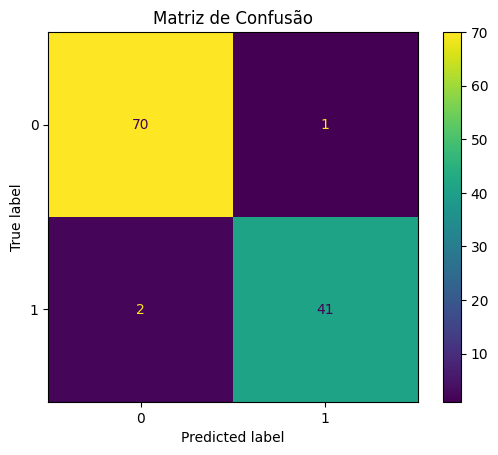

In [5]:
# Definindo a lista de parâmetros a serem testados
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12, 14, 16],
    'max_features': ["sqrt", "log2", None]
}

# Criando e treiando o modelo de árvore de decisão
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=10)
grid_search.fit(train_data, train_labels)

print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print(f"Acurácia correspondente: {grid_search.best_score_}")

# Plotado a Matriz de Confusão
labels_pred = grid_search.predict(test_data)
cm = confusion_matrix(test_labels, labels_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Matriz de Confusão")
plt.show()

Para avaliar a performance do nosso modelo, iremos usar a precisão, o recall, o F1-score, a média do cross-validation e a matriz de confusão para avaliar o quão bem o nosso modelo classifica o nosso conjunto de teste.


Considerando a seguinte legenda:
*  **TP** = True Positive, ou seja, as instâncias positivas que foram corretamente classificadas como positivas
*  **TN** = True Negative, ou seja, as instâncias negativas que foram corretamente classificadas como negativas
*  **FP** = False Positive, ou seja, as instâncias negativas que foram classificadas como positivas
*  **FN** = False Negative, ou seja, as instâncias positivas que foram classificadas como negativas

Temos que:
*  **Acurâcia**: Mede a proporção de instâncias que são classificadas corretamente, ou seja, é a quantidade de instâncias classificadas corretamente dividido pela quantidade total de instâncias no conjunto de testes, sendo calculada como (TP + TN) / (TP + TN + FP + FN)
*  **Precisão**: Mede a proporção de instâncias que foram corretamente classificadas como positivas, ou seja, é a quantidade de instâncias positivas classificadas como positivas dividido pela quantidade de instâncias que foram classificadas como positivas, sendo calculado como TP / (TP + FP)
*  **Recall**: Mede a proporção de instâncias positivas que são classificadas como positivas, sendo calculado como TP / (TP + FN)
*  **F1-Score**: É a média harmônica da precisão e do recall, sendo calculada como 2 * (precisão * recall) / (precisão + recall)


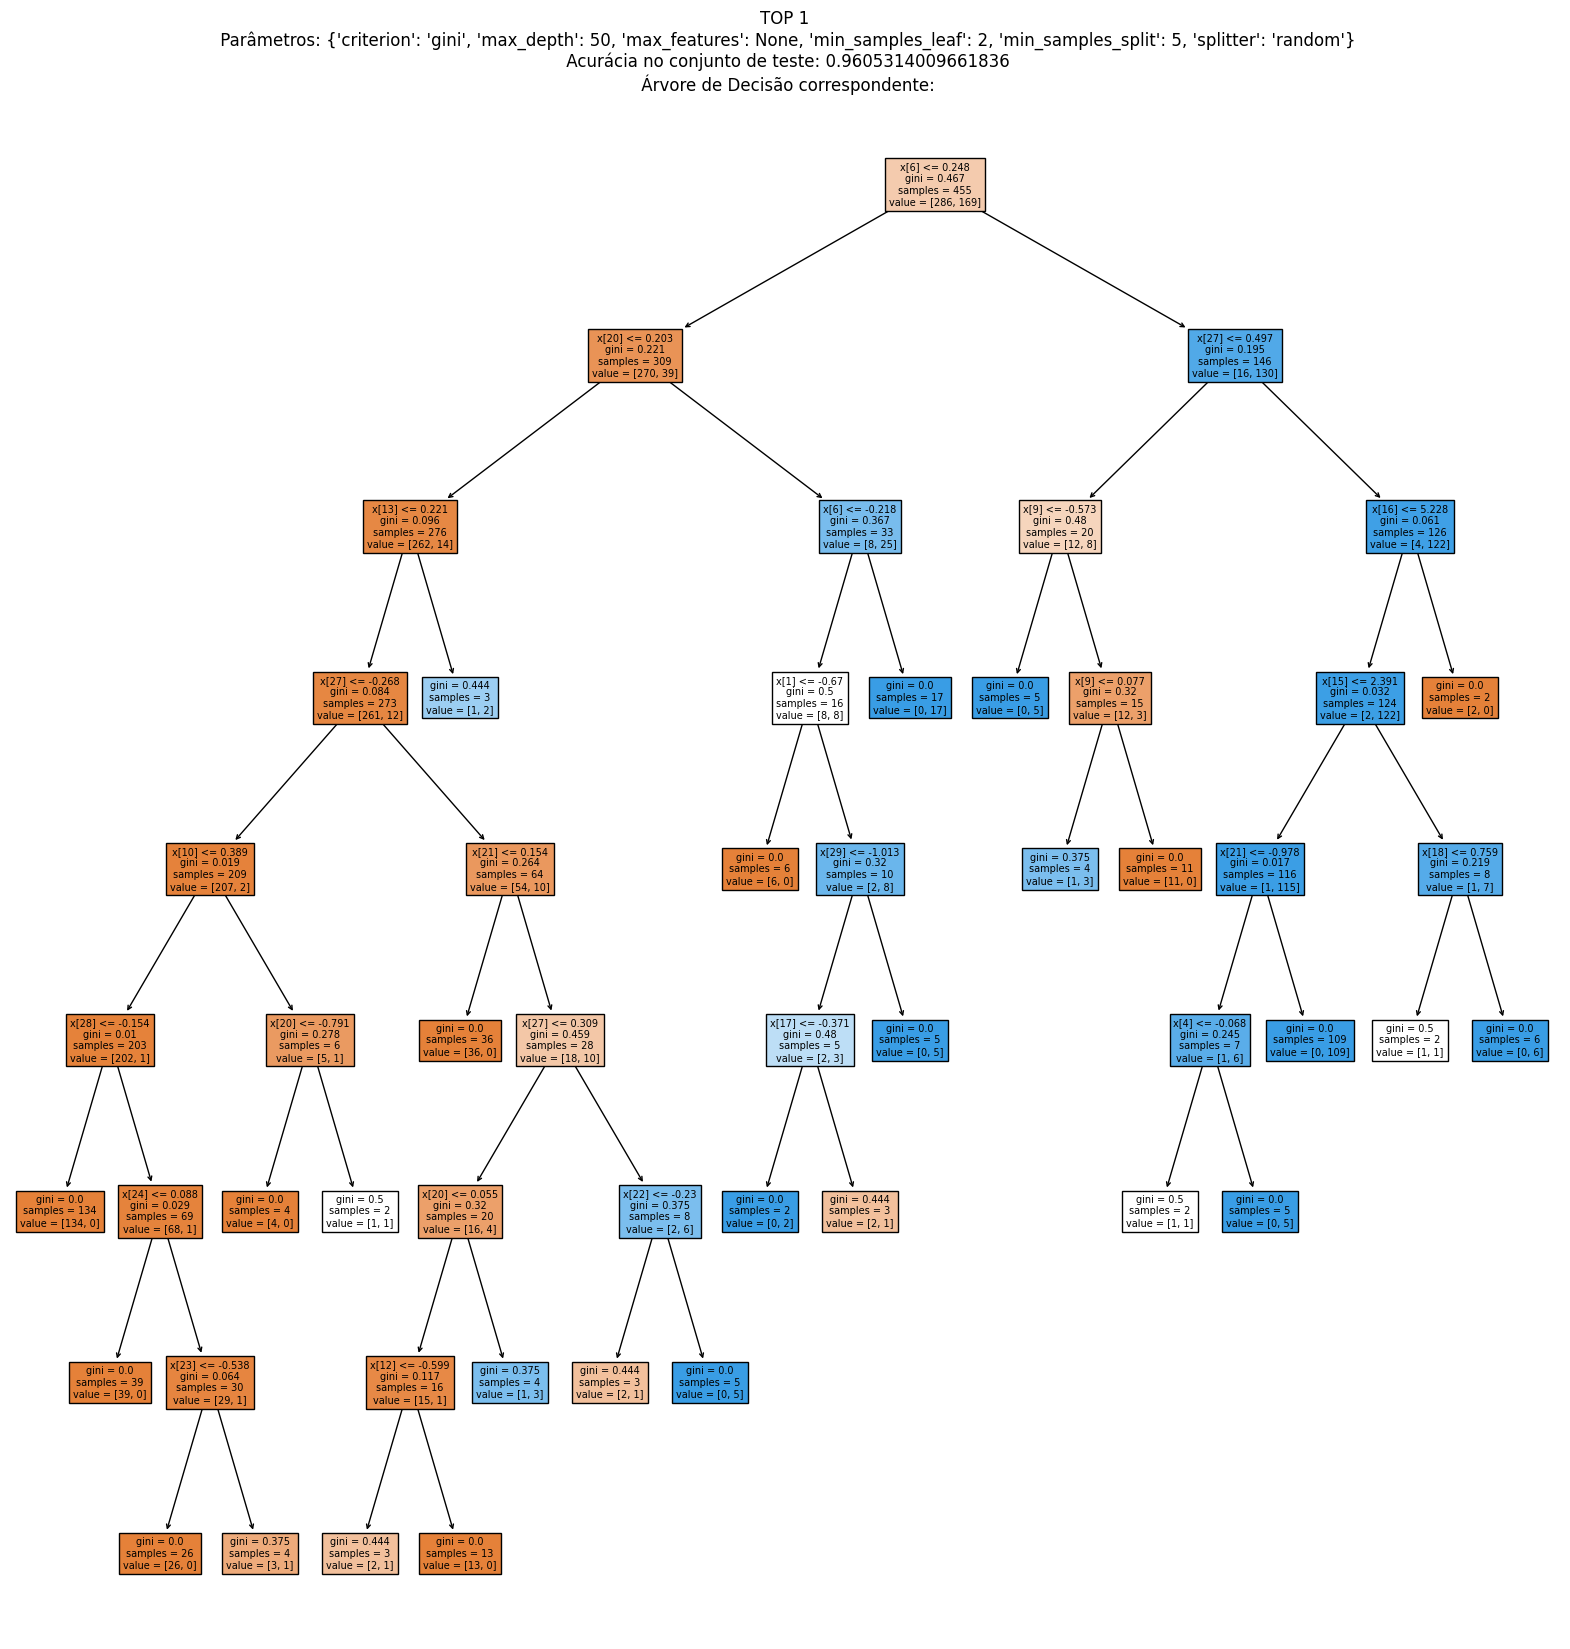

Média do cross-validation do teste: 0.9031620553359684
Precisão do teste: 0.918918918918919
Sensibilidade (recall) do teste: 0.9577464788732394
F1-Score do teste: 0.9379310344827587



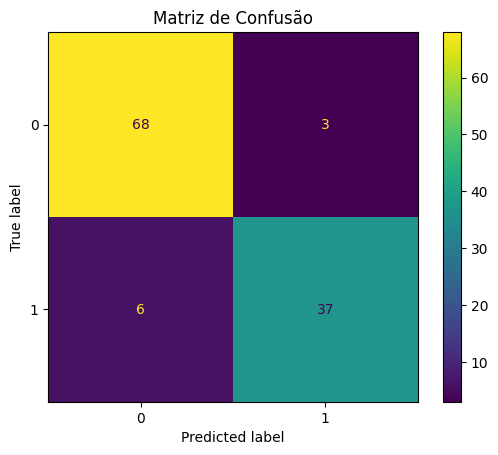

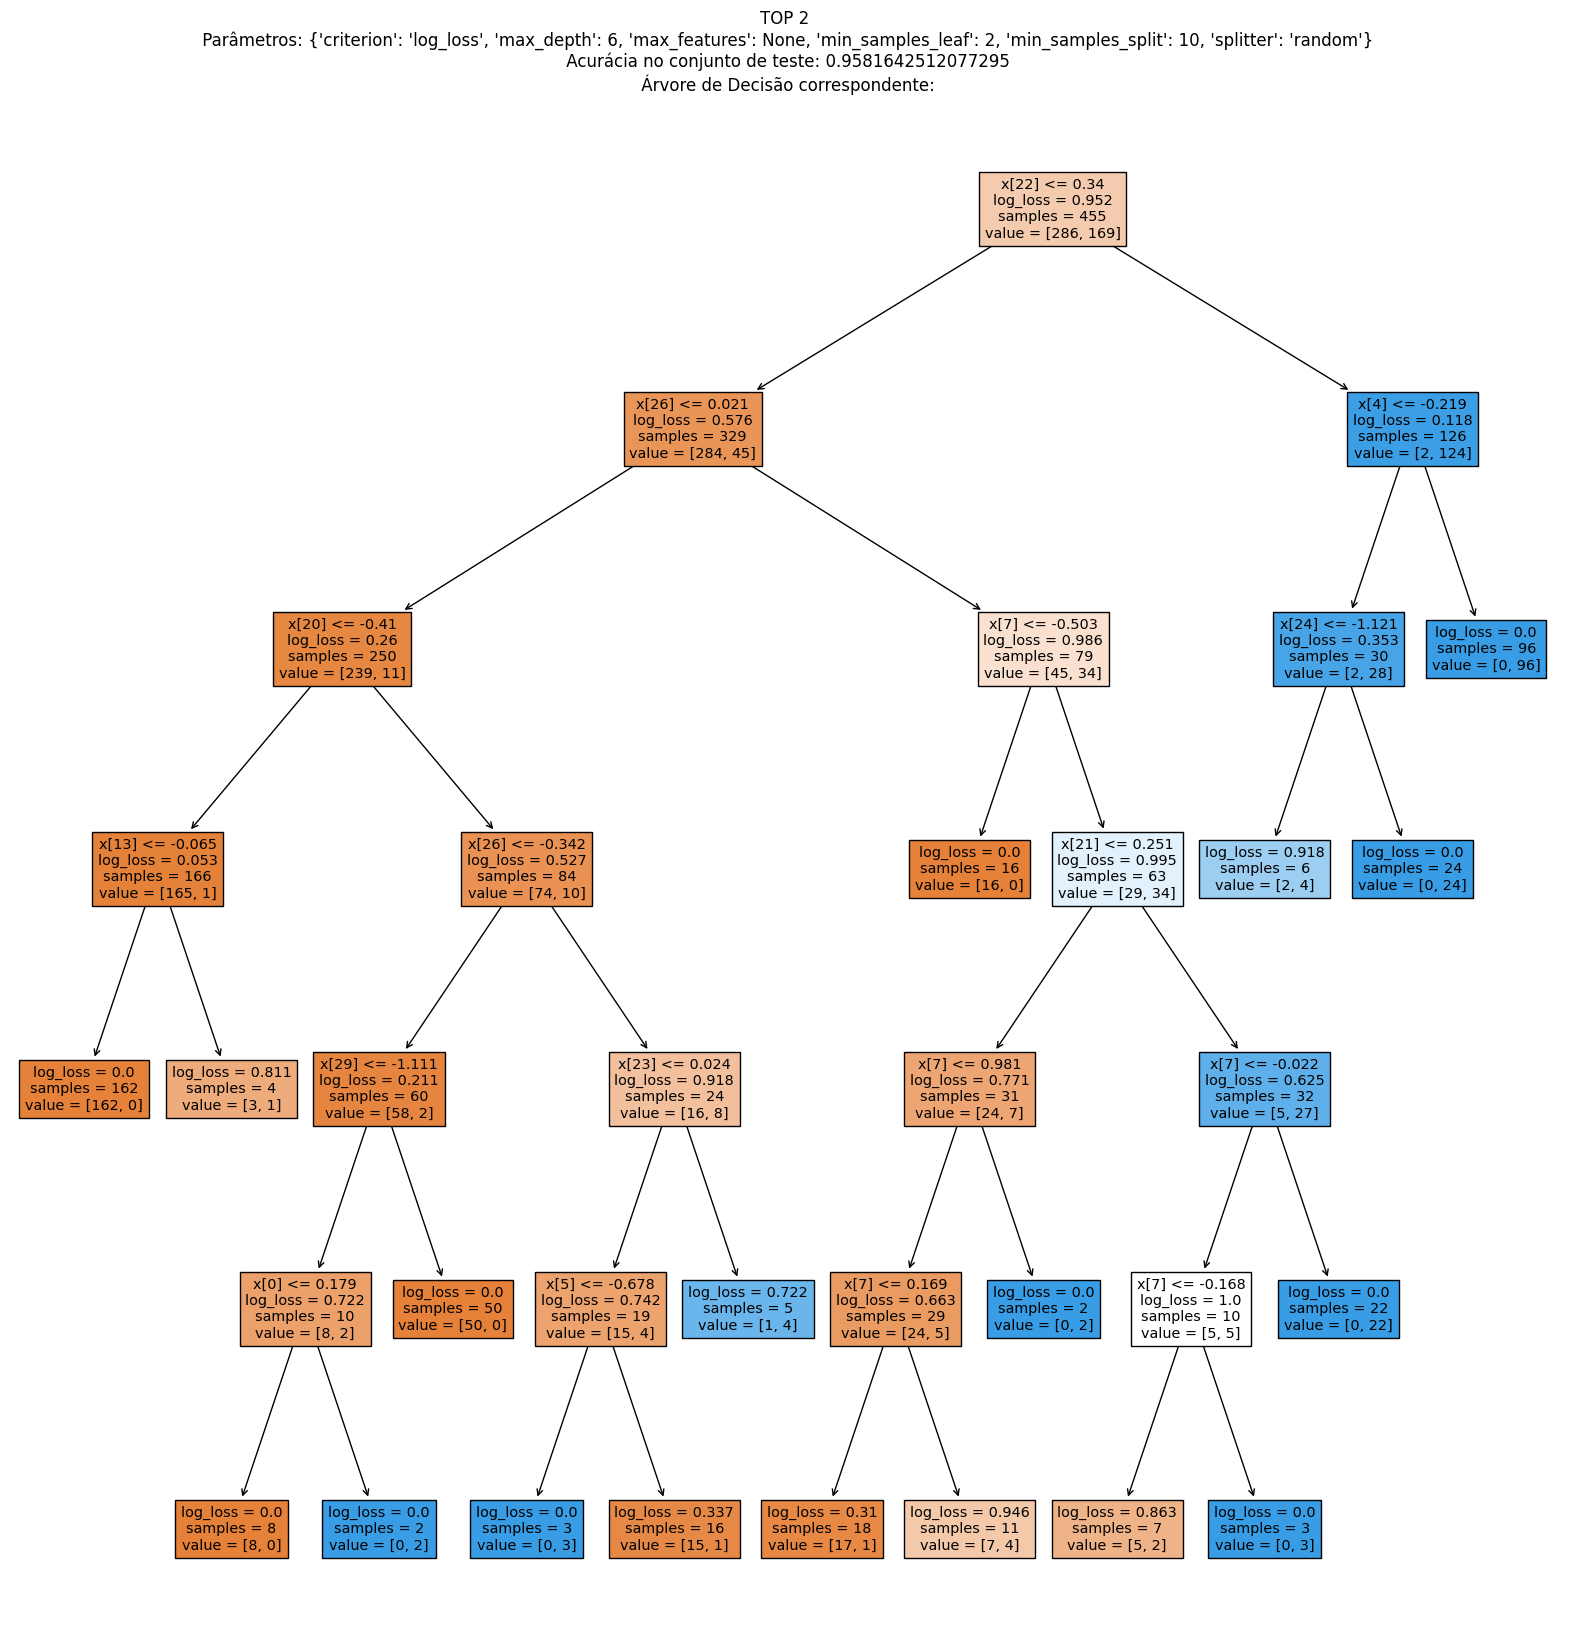

Média do cross-validation do teste: 0.8936758893280633
Precisão do teste: 0.9428571428571428
Sensibilidade (recall) do teste: 0.9295774647887324
F1-Score do teste: 0.9361702127659575



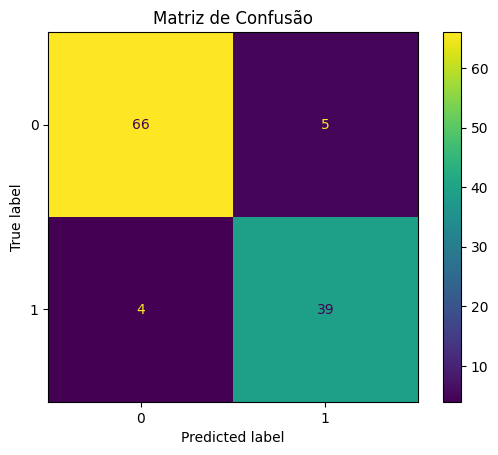

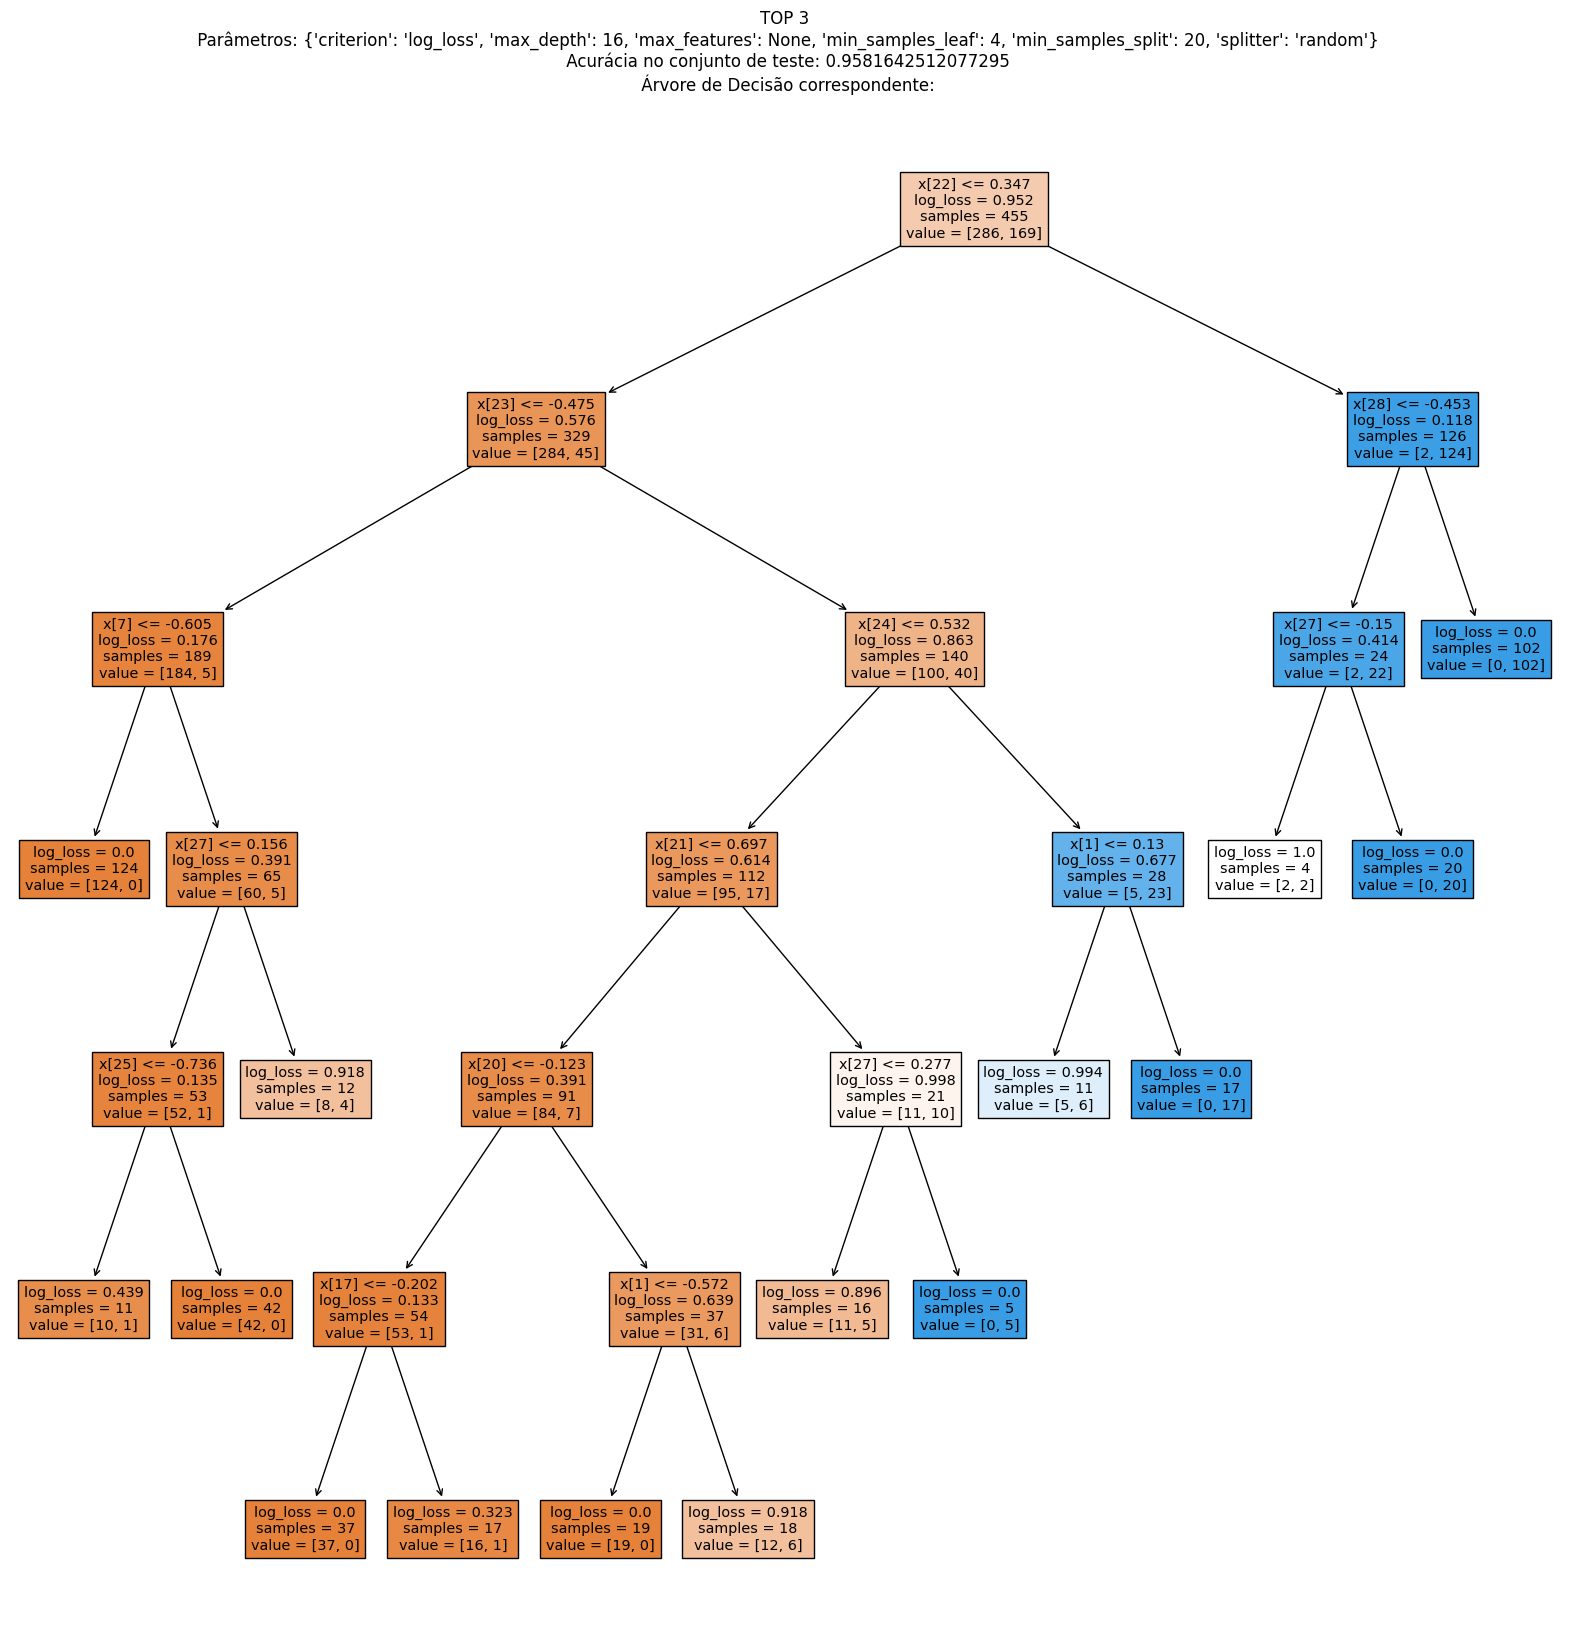

Média do cross-validation do teste: 0.9296442687747035
Precisão do teste: 0.9583333333333334
Sensibilidade (recall) do teste: 0.971830985915493
F1-Score do teste: 0.965034965034965



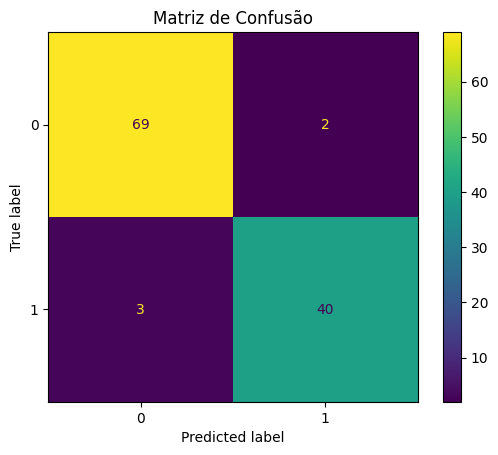

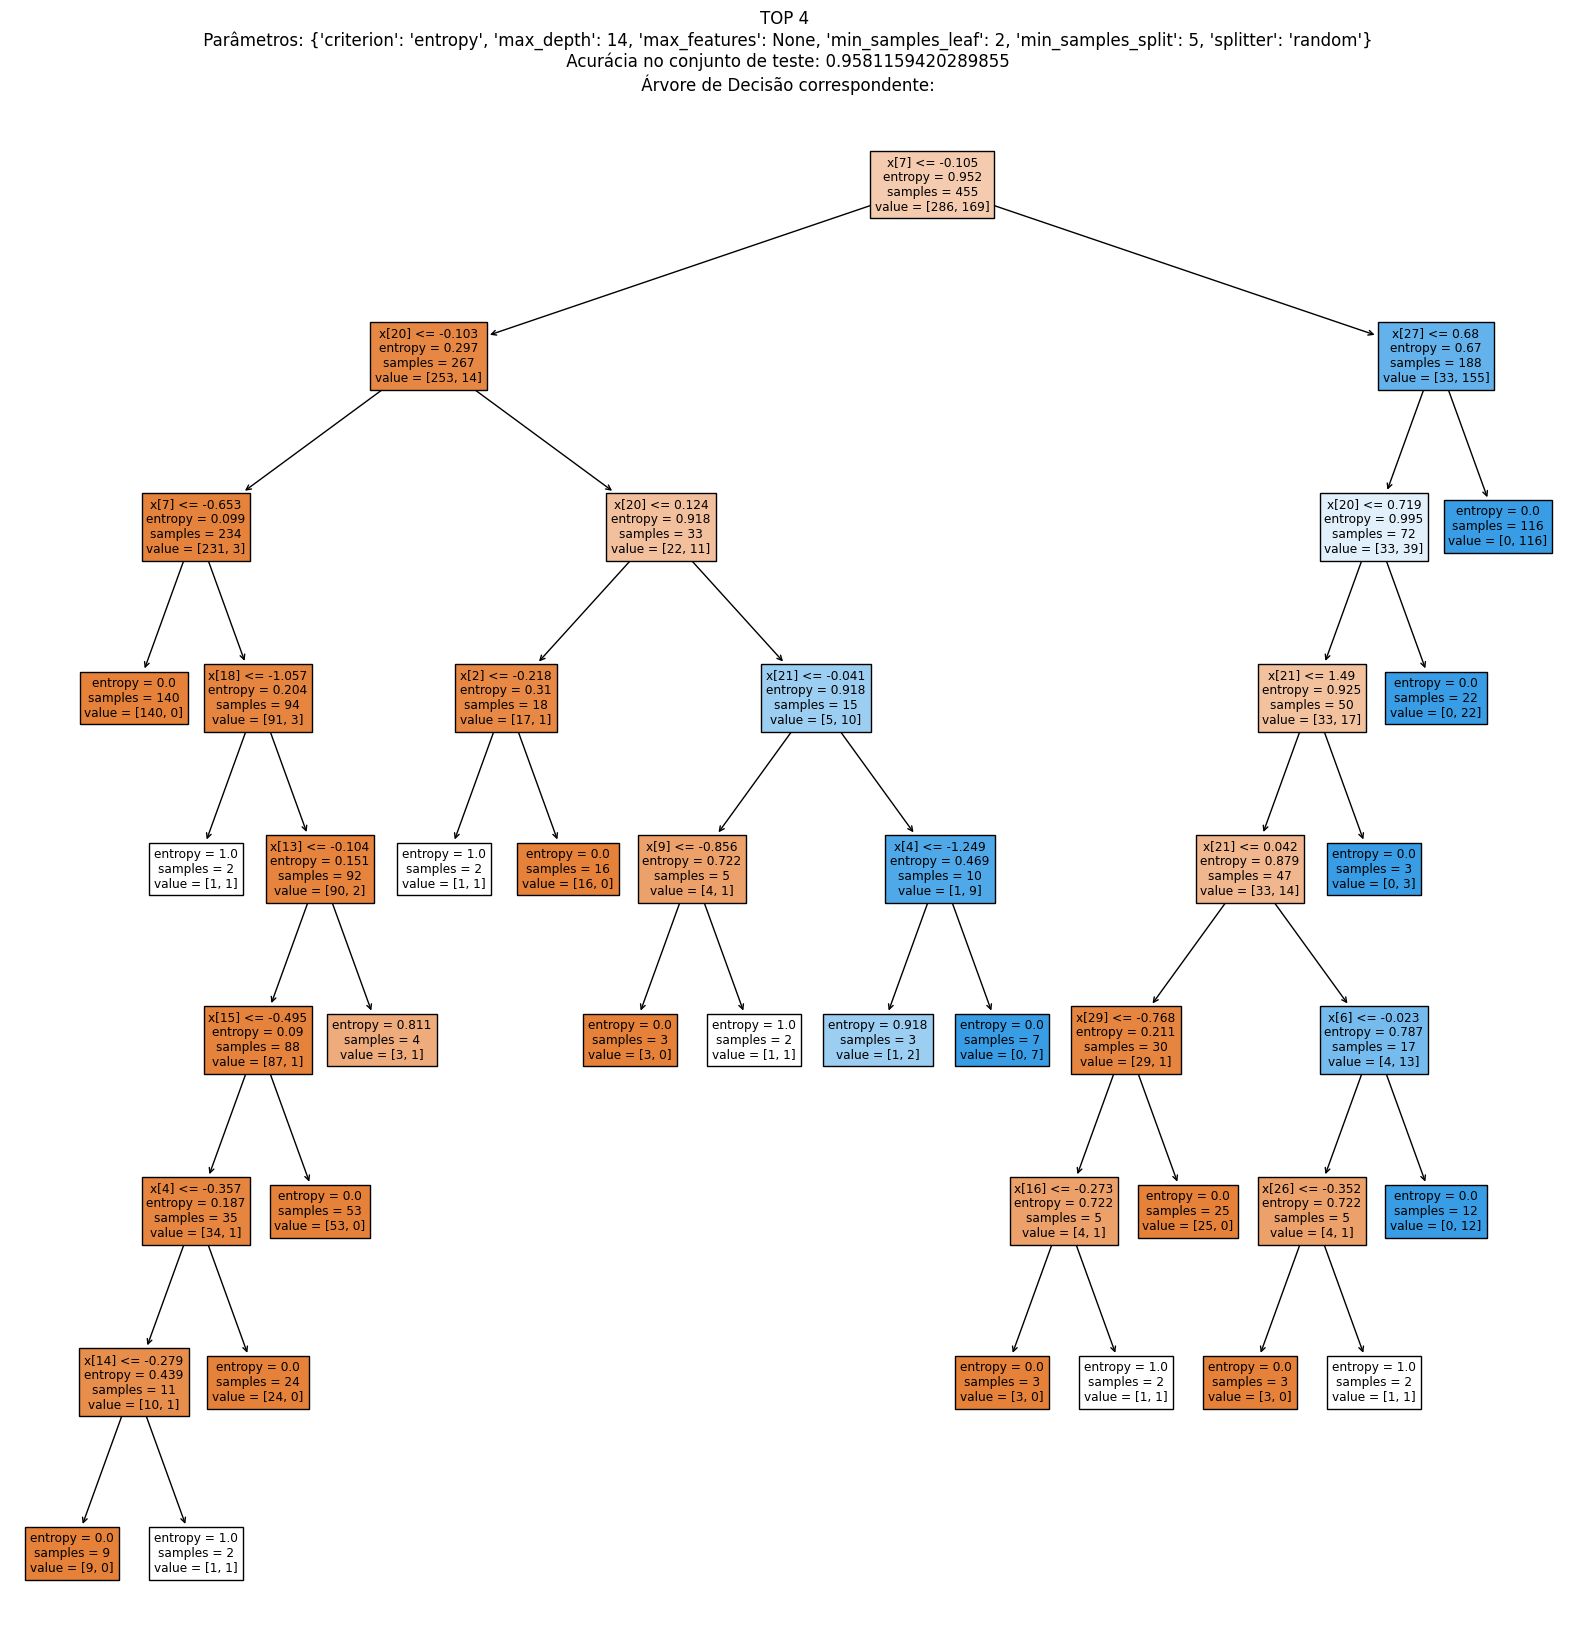

Média do cross-validation do teste: 0.9387351778656127
Precisão do teste: 0.9577464788732394
Sensibilidade (recall) do teste: 0.9577464788732394
F1-Score do teste: 0.9577464788732394



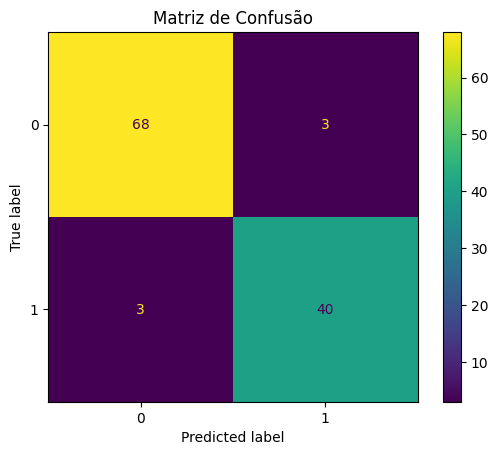

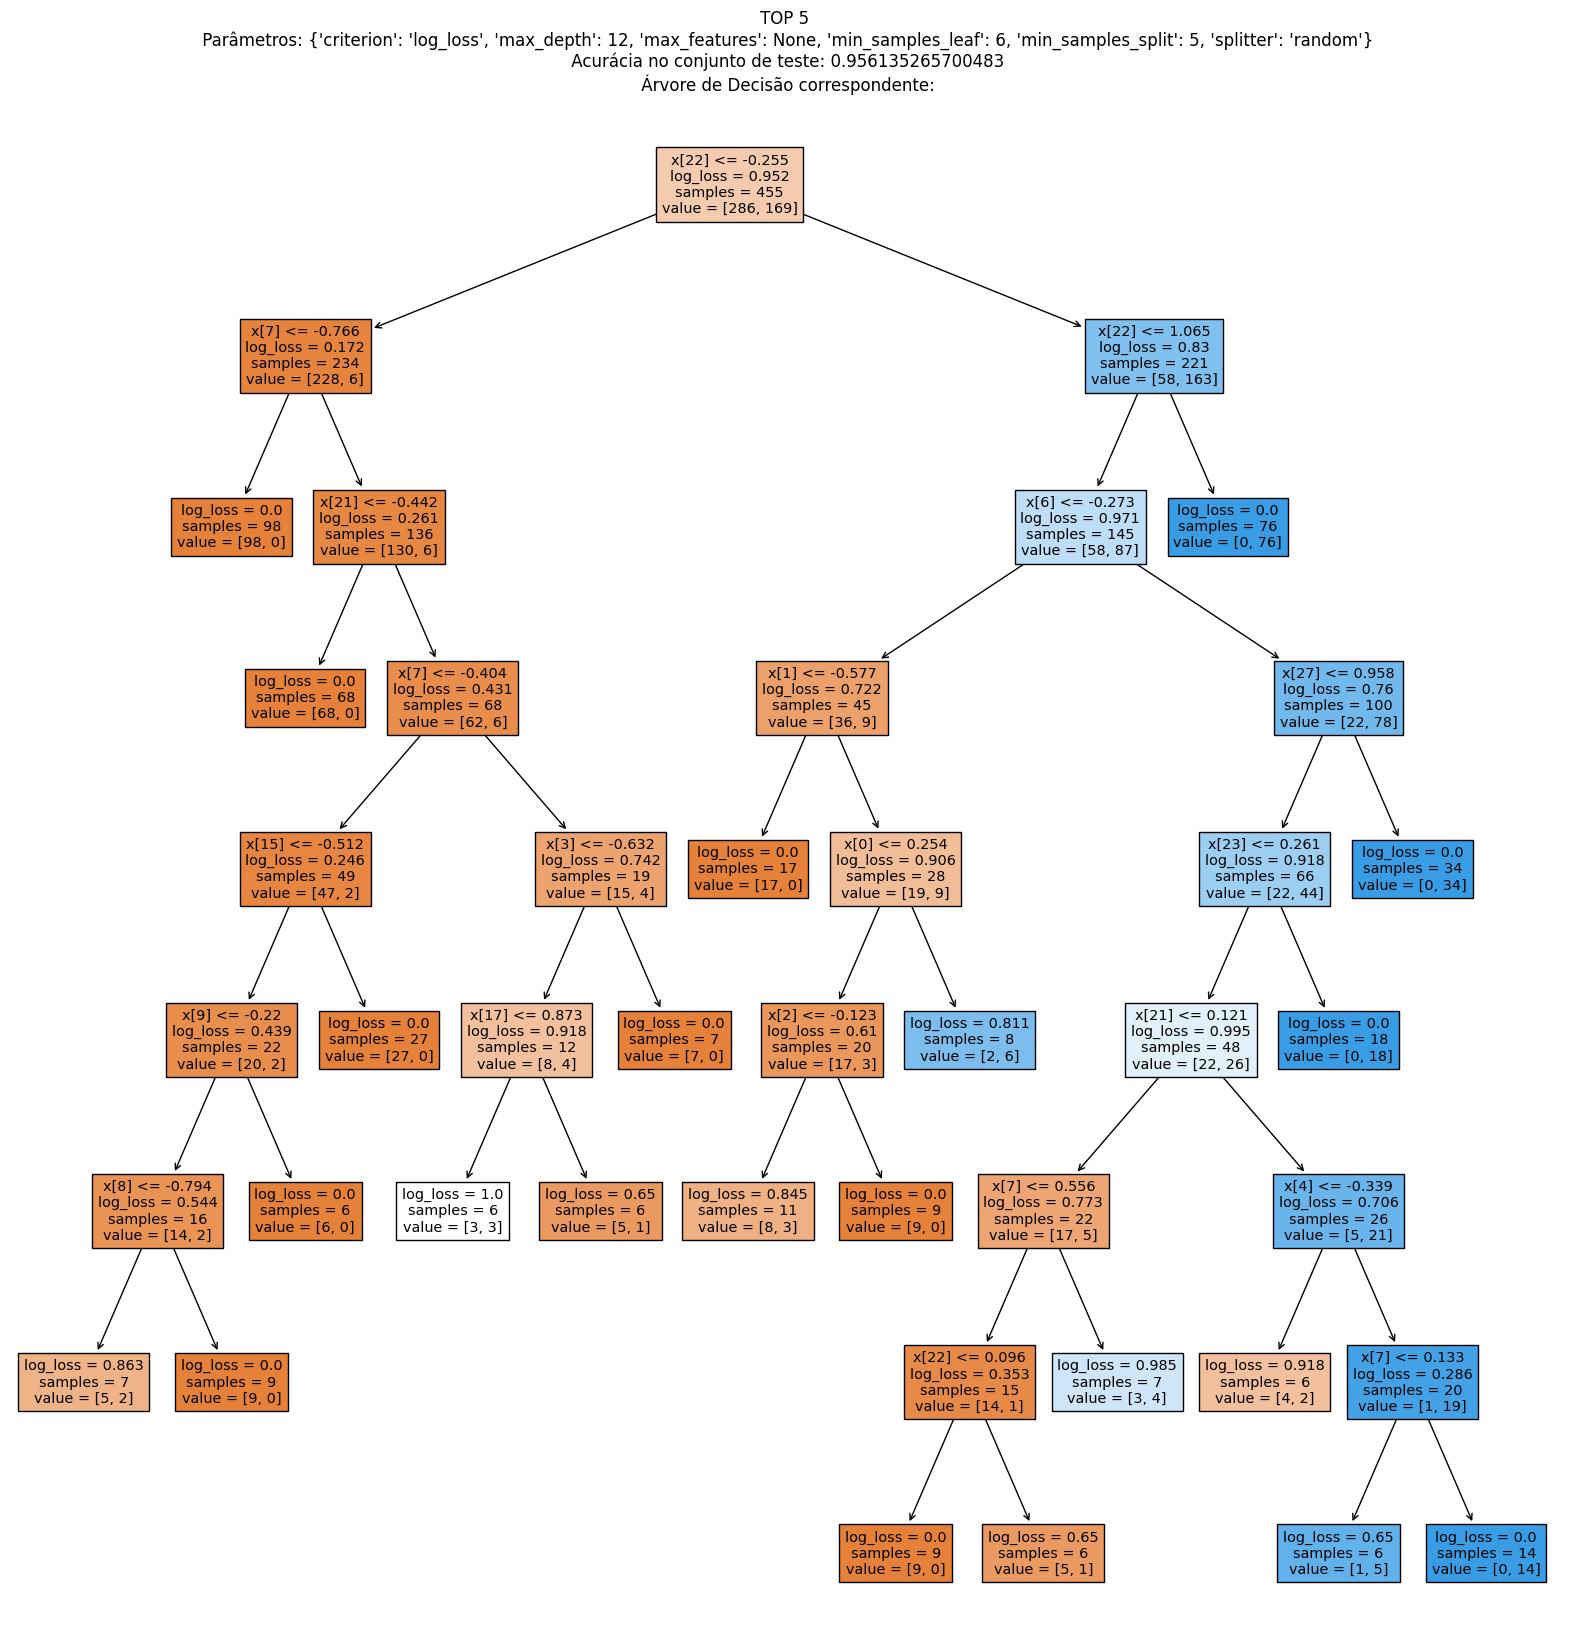

Média do cross-validation do teste: 0.9470355731225297
Precisão do teste: 0.958904109589041
Sensibilidade (recall) do teste: 0.9859154929577465
F1-Score do teste: 0.9722222222222222



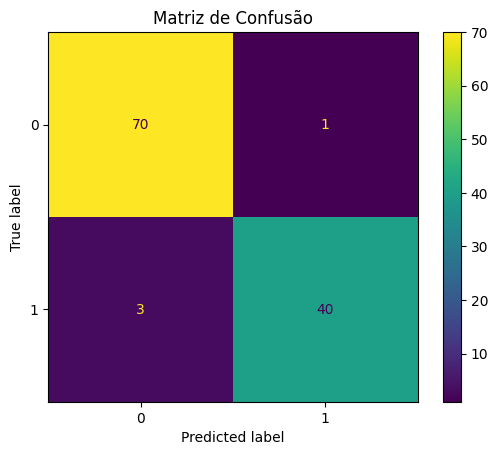

In [9]:
# Retornando o top 5 dos resultados com maior acurácia média
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
top_results = results.head()

for i, (params, mean_score) in enumerate(zip(top_results['params'], top_results['mean_test_score'])):
    # Criando e treinando o modelo
    dt = DecisionTreeClassifier(**params)
    dt.fit(train_data, train_labels)

    # Plotando a Árvore de Decisão
    plt.figure(figsize=(20,20))
    plot_tree(dt, filled=True)
    plt.title(f"TOP {i+1}\n Parâmetros: {params}\n Acurácia no conjunto de teste: {mean_score}\n Árvore de Decisão correspondente:")
    plt.show()

    # Criando o modelo de matrix de confusão
    labels_pred = dt.predict(test_data)
    cm = confusion_matrix(test_labels, labels_pred)

    # Informações adicionais sobre o teste
    print(f"Média do cross-validation do teste: {np.mean(cross_val_score(dt, test_data, test_labels, cv=5))}")
    print(f"Precisão do teste: {precision_score(test_labels, labels_pred, pos_label='B')}")
    print(f"Sensibilidade (recall) do teste: {recall_score(test_labels, labels_pred, pos_label='B')}")
    print(f"F1-Score do teste: {f1_score(test_labels, labels_pred, pos_label='B')}\n")

    # Plotado a Matriz de Confusão
    display = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    plt.title("Matriz de Confusão")
    plt.show()


